In [21]:
from PIL import Image, ImageDraw
import PIL
from IPython.display import display
from PIL import ImageFilter

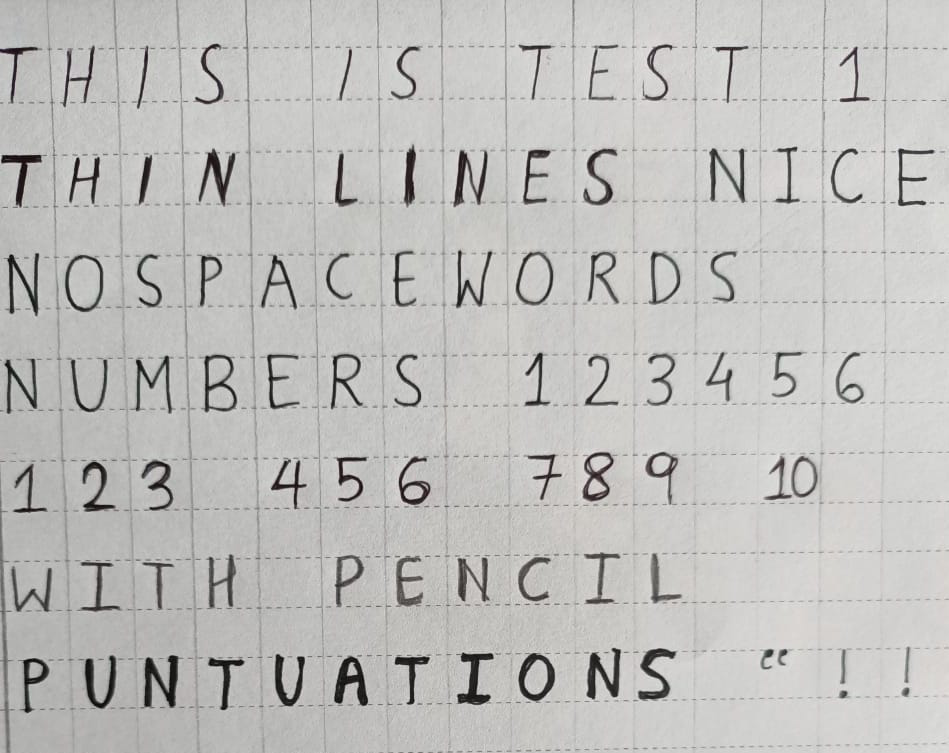

In [22]:
test1 = Image.open("test.jpeg")
display(test1)

In [23]:
import pytesseract
help(pytesseract.image_to_string)

Help on function image_to_string in module pytesseract.pytesseract:

image_to_string(image, lang=None, config='', nice=0, output_type='string', timeout=0)
    Returns the result of a Tesseract OCR run on the provided image to string



In [24]:
# Initial test,without any image processing
txt = pytesseract.image_to_string(test1)
print(txt)

Pes ses ctr
FAIA LEME SONIC E

NIOISIP AIC IE WiO.R.D.S

MOUIMIBIEIRIS! (1125.45 ¢
A\23) 456. 78.4 40

PUNTUATIONS cEET |


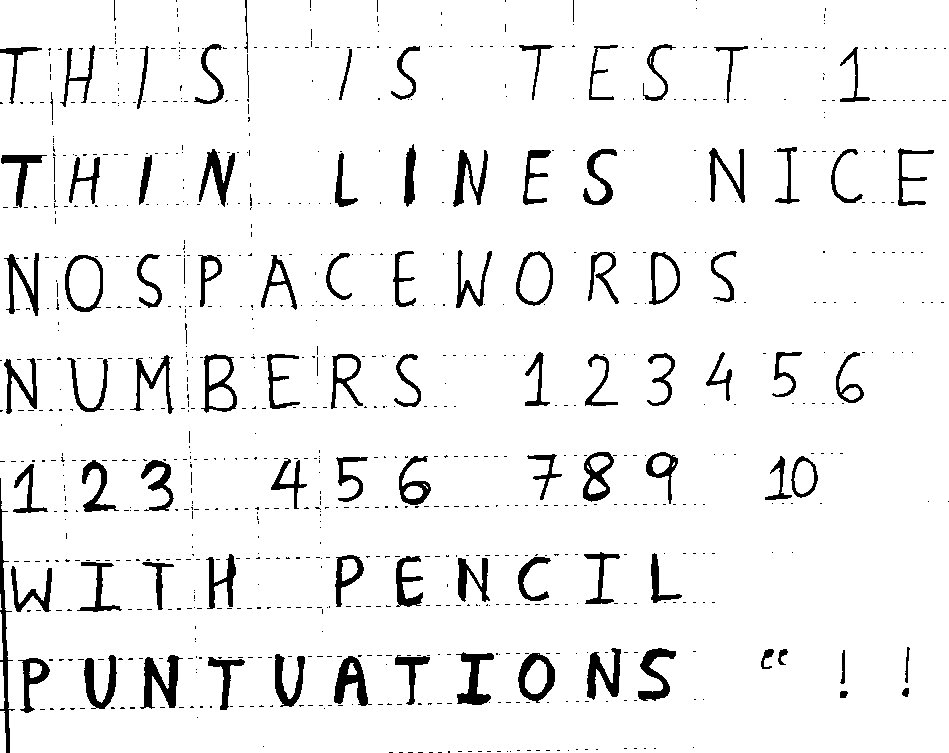

THIS) 1S TEST 1

NOSPACEWORDS
NUMBERS 123456
423 456 789 10
WITH PENCIL


In [35]:
def binarize(image, threshold):
    image = image.convert('L')
    for x in range(image.width):
        for y in range(image.height):
            v = image.getpixel((x,y))
            if(v < threshold):
                image.putpixel((x,y),0)
            else:
                image.putpixel((x,y),255)
    
    return image

bin_test1 = binarize(test1,150)
display(bin_test1)

bin_txt = pytesseract.image_to_string(bin_test1)
print(bin_txt)

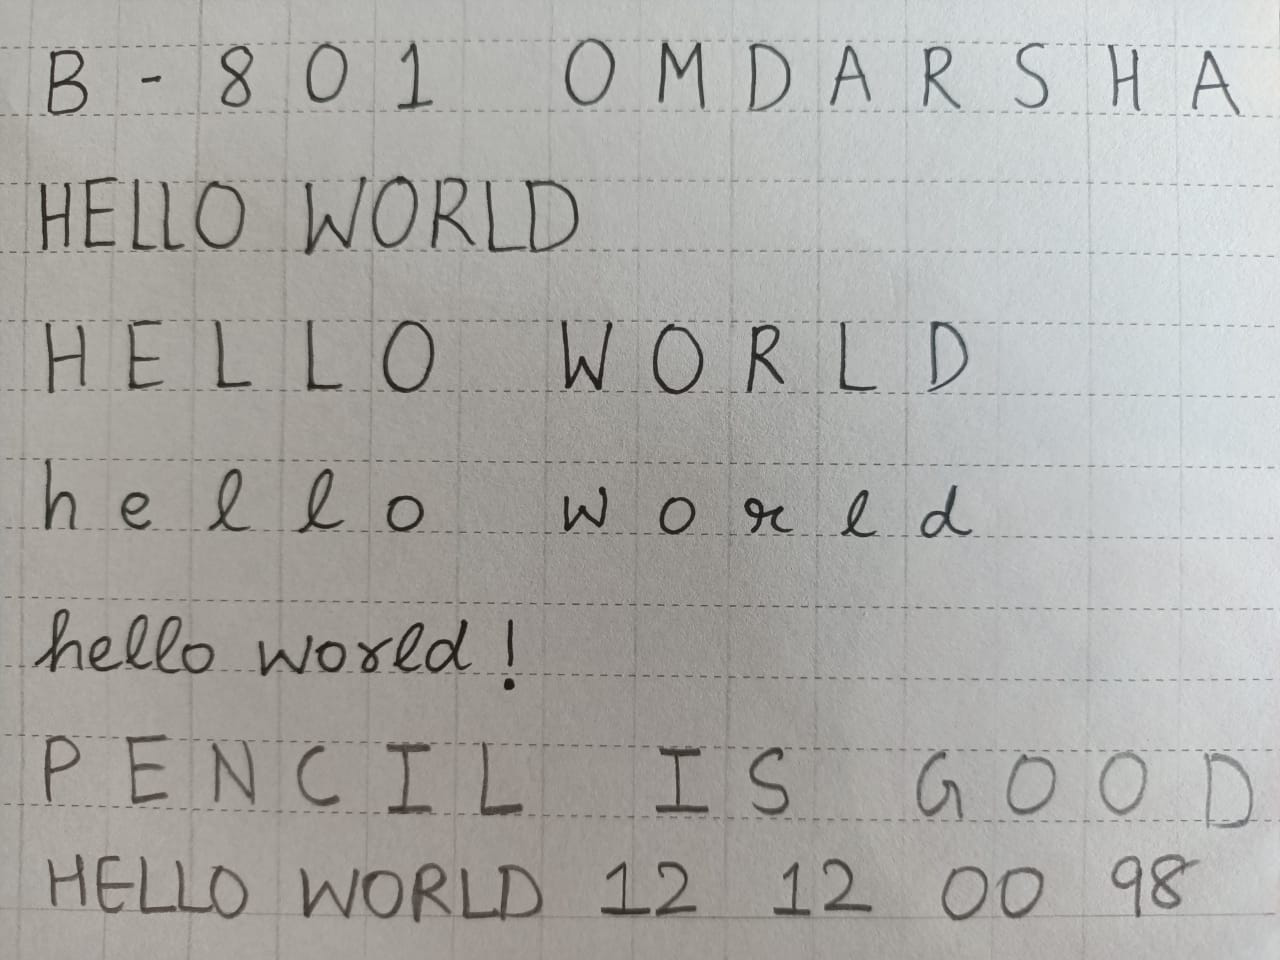

'HEL OT WORMEaee 2 OO 16'

In [37]:
# now on test 2 

test2 = Image.open("test2.jpeg")
display(test2)
# without any image manipulation

txt = pytesseract.image_to_string(test2)
txt

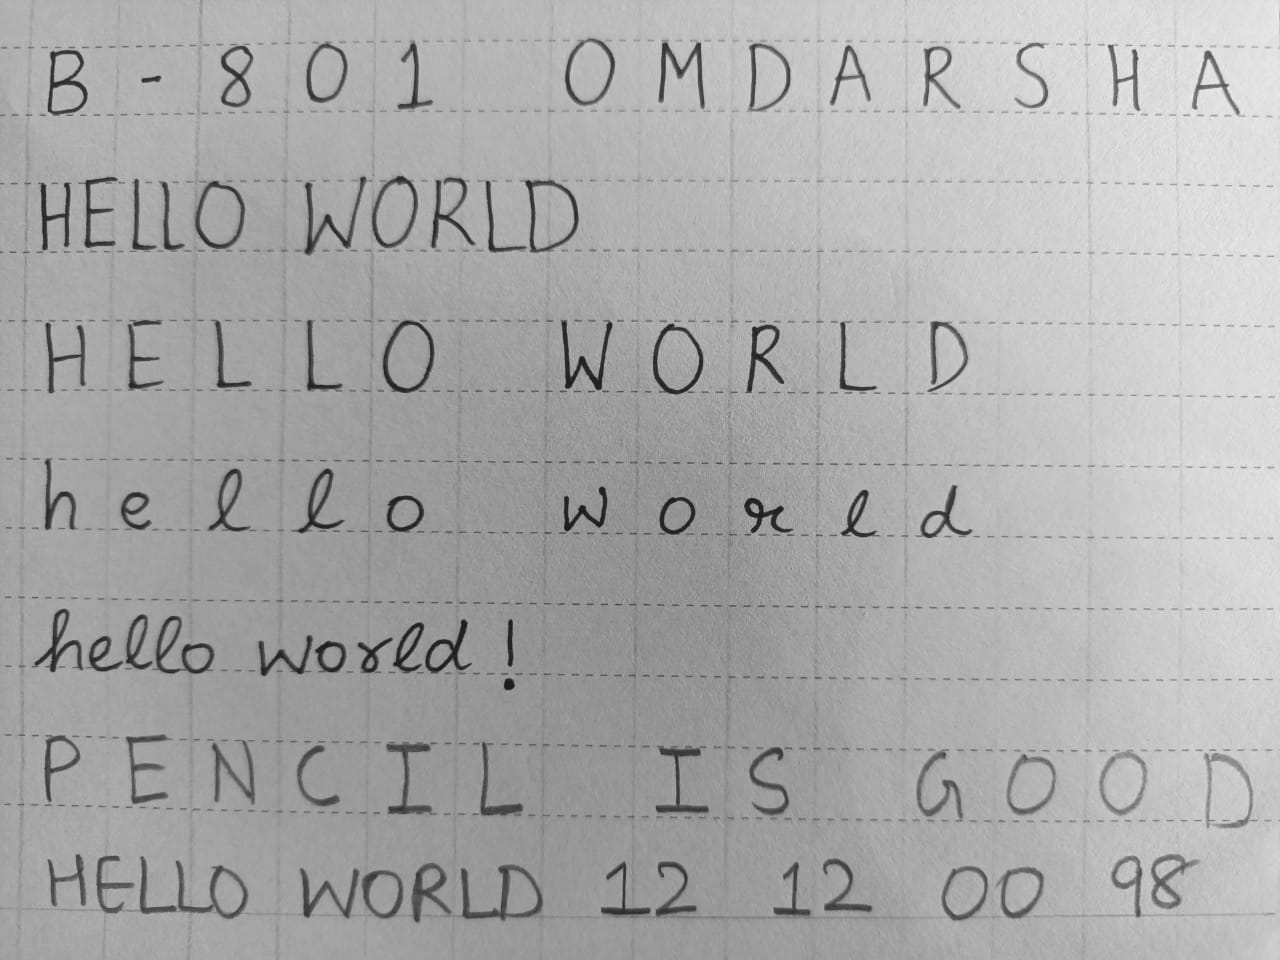

''

In [41]:
# it failed, like really bad results
# now lets try on grayscale first

test2b = test2.convert('L')
display(test2b)

txt = pytesseract.image_to_string(test2b)
txt

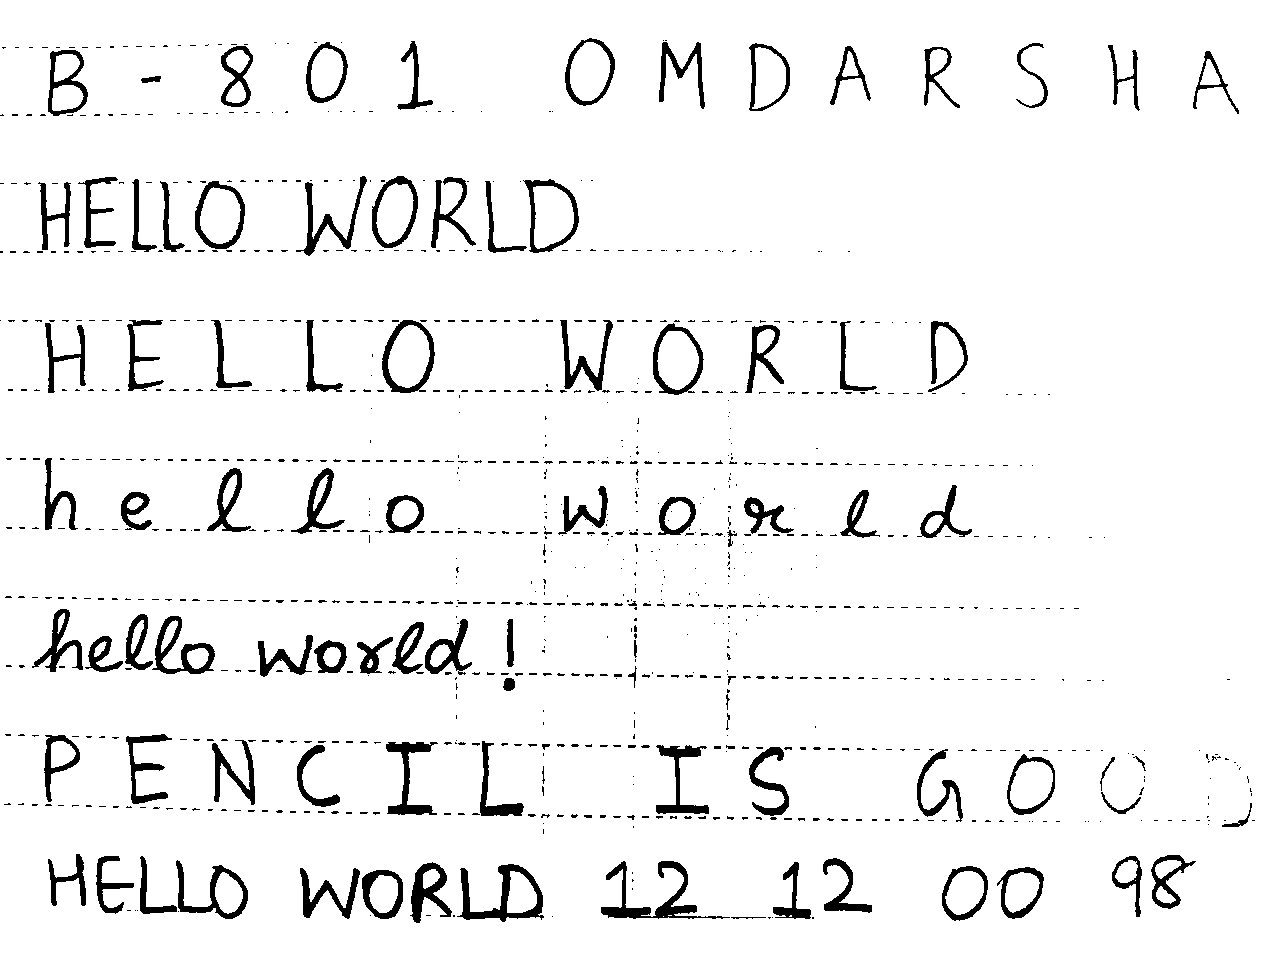

'B- 801 OMDARSHA\nHELLO WORLD _-\nHELL LOL WOR LD\n\nAello world |.\n\nween ne dee ewe e pee ee eee eee\n\nPENCIL ILO Goo”\n\nHELLO WORLD 12.12 O00 "6'

In [59]:
#ok still bad result, lets try to binarize it
test2c = binarize(test2, 135)
display(test2c)

txt = pytesseract.image_to_string(test2c)
txt

In [1]:
# final result is not that bad, it recognise few words very well. Captial thin black pen is well recognised
# numbers are also recognised... so good 
# we can have a last test, where we used only the capital and can try to get the whole text

In [2]:
# even though tesseract works great on printed text, it does work on well written text